<a href="https://colab.research.google.com/github/TR-Tanmoy/Predicting-education-level-of-farmer-s-offspring-using-machine-learning-technique/blob/main/Thesis_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Some Library**

In [ ]:
! pip install -q scikit-plot

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# **Load DataSet**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Thesis /Dataset/Dataset.csv")

In [ ]:
df.head(10)

,Timestamp,What's the farmer's name?,What's the age of the farmer?,How many family member;s do you have,How many childern's do you have?,How many spouses do you have?,What's the Farmer's education level?,What's the Farmer's wife educational level?,How many earning person presentation in the family?,Total family income in month-,Do you have any higher educational person in the family?,Do you have your own house?,What is the type of the house?,Do you have any extra incone source?,Amount of own land?,How much land does the farmer cultivate?,Do you work as a sharecroper in another's land?,Do you have any loan?,Is the farmer drag addicted?,Are the childern's drag addicted?,Is there any severely sick family member?,What is the time duration between home and school?,What is the educational background of farmer's offspring?
0,6/23/2021 16:37,Md. Nur Hossain,51,5,2,1,AH,AC5BS,1,Medium,No,Yes,Brick_Built,Yes,8.0,4.0,No,No,No,No,No,Average,AH
1,6/23/2021 16:49,Md. Ajit,55,5,3,1,Illiterate,Illiterate,3,Low,No,Yes,Mud_Built,No,1.5,3.5,Yes,Yes,No,No,No,Long,Illiterate
2,6/23/2021 17:07,Md. Hobibor Rahman,57,4,2,2,Illiterate,BC5,2,Low,No,Yes,Mud_Built,No,2.1,3.0,Yes,Yes,No,No,No,Long,Illiterate
3,6/23/2021 18:02,Md. Mofijur,47,3,1,1,Illiterate,AC5BS,2,Low,No,Yes,Mud built,No,1.5,2.0,Yes,Yes,No,No,No,Long,AC5BS
4,6/23/2021 18:09,Md. Tobibor Rahman,65,5,4,1,Illiterate,Illiterate,1,Low,No,Yes,Mud_Built,No,3.0,2.0,Yes,No,No,No,No,Long,Illiterate
5,6/23/2021 19:16,Babur Ali,63,6,4,1,Illiterate,Illiterate,3,Low,No,Yes,Mud_Built,No,1.0,2.0,Yes,No,No,No,No,Average,Illiterate
6,6/23/2021 22:25,Nur Islam,60,8,3,1,Illiterate,Illiterate,2,Low,No,Yes,Mud_Built,No,0.5,2.0,Yes,Yes,No,No,No,Long,Illiterate
7,6/23/2021 22:30,Md. Usuf ALi,59,4,2,1,BC5,BC5,2,Low,No,Yes,Mud_Built,No,3.0,2.0,No,No,No,No,No,Long,AC5BS
8,6/23/2021 22:32,Md. Shirazul Islam,48,6,2,1,BC5,AC5BS,1,Medium,No,Yes,Brick_Built,Yes,4.0,3.0,No,Yes,No,No,No,Long,ASBH
9,6/23/2021 23:18,Md. Khalek,45,4,2,1,BC5,BC5,1,Low,No,Yes,Mud_Built,Yes,3.0,4.0,Yes,Yes,No,No,No,Long,AC5BS


In [ ]:
df.shape

(506, 23)

In [ ]:
df.columns

Index(['Timestamp', 'What's the farmer's name?',
       'What's the age of the farmer?', 'How many family member;s do you have',
       'How many childern's do you have?', 'How many spouses do you have?',
       'What's the Farmer's education level?',
       'What's the Farmer's wife educational level?',
       'How many earning person presentation in the family?',
       'Total family income in month-',
       'Do you have any higher educational person in the family?',
       'Do you have your own house?', 'What is the type of the house?',
       'Do you have any extra incone source?', 'Amount of own land?',
       'How much land does the farmer cultivate?',
       'Do you work as a sharecroper in another's land?',
       'Do you have any loan?', 'Is the farmer drag addicted?',
       'Are the childern's drag addicted?',
       'Is there any severely sick family member?',
       'What is the time duration between home and school?',
       'What is the educational background of farmer'

In [ ]:
df["What is the educational background of farmer's offspring?"].unique()

array(['AH', 'Illiterate', 'AC5BS', 'ASBH', 'BC5'], dtype=object)

In [ ]:
pd.value_counts(df["What is the educational background of farmer's offspring?"])

Illiterate    136
AC5BS         117
BC5            98
AH             88
ASBH           67
Name: What is the educational background of farmer's offspring?, dtype: int64

In [ ]:
df["What is the educational background of farmer's offspring?"].count()

506

In [ ]:
df.rename({"What's the farmer's name?":'Name'},axis=1,inplace=True)
df.rename({"What's the age of the farmer?":'Age'},axis=1,inplace=True)
df.rename({"How many family member;s do you have":'FM'},axis=1,inplace=True)
df.rename({"How many childern's do you have?":'NC'},axis=1,inplace=True)
df.rename({"How many spouses do you have?":'NS'},axis=1,inplace=True)
df.rename({"What's the Farmer's education level?":'FQ'},axis=1,inplace=True)
df.rename({"What's the Farmer's wife educational level?":'FWQ'},axis=1,inplace=True)
df.rename({"How many earning person presentation in the family?":'NEP'},axis=1,inplace=True)
df.rename({"Total family income in month-":'FMI'},axis=1,inplace=True)
df.rename({"Do you have any higher educational person in the family?":'HEP'},axis=1,inplace=True)
df.rename({"Do you have your own house?":'OH'},axis=1,inplace=True)
df.rename({"What is the type of the house?":'HT'},axis=1,inplace=True)
df.rename({"Do you have any extra incone source?":'EIS'},axis=1,inplace=True)
df.rename({"Amount of own land?":'AOL'},axis=1,inplace=True)
df.rename({"How much land does the farmer cultivate?":'ALC'},axis=1,inplace=True)
df.rename({"Do you work as a sharecroper in another's land?":'SC'},axis=1,inplace=True)
df.rename({"Do you have any loan?":'LOAN'},axis=1,inplace=True)
df.rename({"Is the farmer drag addicted?":'FDA'},axis=1,inplace=True)
df.rename({"Are the childern's drag addicted?":'CDA'},axis=1,inplace=True)
df.rename({"Is there any severely sick family member?":'SFM'},axis=1,inplace=True)
df.rename({"What is the time duration between home and school?":'TDBHC'},axis=1,inplace=True)
df.rename({"What is the educational background of farmer's offspring?":'CQ'},axis=1,inplace=True)


In [ ]:
df.head()

,Timestamp,Name,Age,FM,NC,NS,FQ,FWQ,NEP,FMI,HEP,OH,HT,EIS,AOL,ALC,SC,LOAN,FDA,CDA,SFM,TDBHC,CQ
0,6/23/2021 16:37,Md. Nur Hossain,51,5,2,1,AH,AC5BS,1,Medium,No,Yes,Brick_Built,Yes,8.0,4.0,No,No,No,No,No,Average,AH
1,6/23/2021 16:49,Md. Ajit,55,5,3,1,Illiterate,Illiterate,3,Low,No,Yes,Mud_Built,No,1.5,3.5,Yes,Yes,No,No,No,Long,Illiterate
2,6/23/2021 17:07,Md. Hobibor Rahman,57,4,2,2,Illiterate,BC5,2,Low,No,Yes,Mud_Built,No,2.1,3.0,Yes,Yes,No,No,No,Long,Illiterate
3,6/23/2021 18:02,Md. Mofijur,47,3,1,1,Illiterate,AC5BS,2,Low,No,Yes,Mud built,No,1.5,2.0,Yes,Yes,No,No,No,Long,AC5BS
4,6/23/2021 18:09,Md. Tobibor Rahman,65,5,4,1,Illiterate,Illiterate,1,Low,No,Yes,Mud_Built,No,3.0,2.0,Yes,No,No,No,No,Long,Illiterate


In [ ]:
df.drop('Timestamp',axis=1,inplace=True)

In [ ]:
df.drop('Name',axis=1,inplace=True)

In [ ]:
df.head()

,Age,FM,NC,NS,FQ,FWQ,NEP,FMI,HEP,OH,HT,EIS,AOL,ALC,SC,LOAN,FDA,CDA,SFM,TDBHC,CQ
0,51,5,2,1,AH,AC5BS,1,Medium,No,Yes,Brick_Built,Yes,8.0,4.0,No,No,No,No,No,Average,AH
1,55,5,3,1,Illiterate,Illiterate,3,Low,No,Yes,Mud_Built,No,1.5,3.5,Yes,Yes,No,No,No,Long,Illiterate
2,57,4,2,2,Illiterate,BC5,2,Low,No,Yes,Mud_Built,No,2.1,3.0,Yes,Yes,No,No,No,Long,Illiterate
3,47,3,1,1,Illiterate,AC5BS,2,Low,No,Yes,Mud built,No,1.5,2.0,Yes,Yes,No,No,No,Long,AC5BS
4,65,5,4,1,Illiterate,Illiterate,1,Low,No,Yes,Mud_Built,No,3.0,2.0,Yes,No,No,No,No,Long,Illiterate


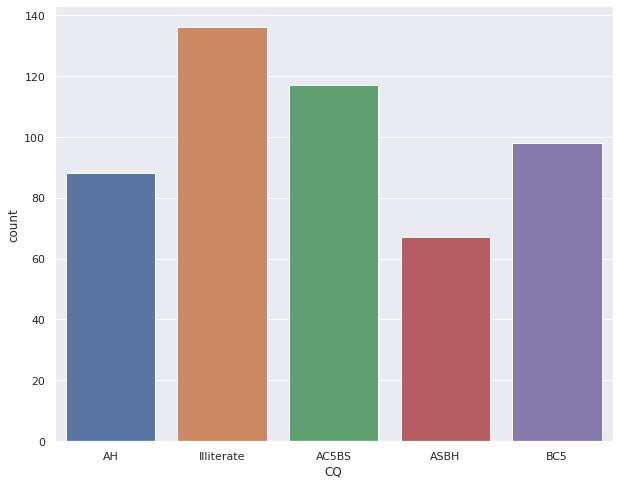

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x='CQ', data=df)

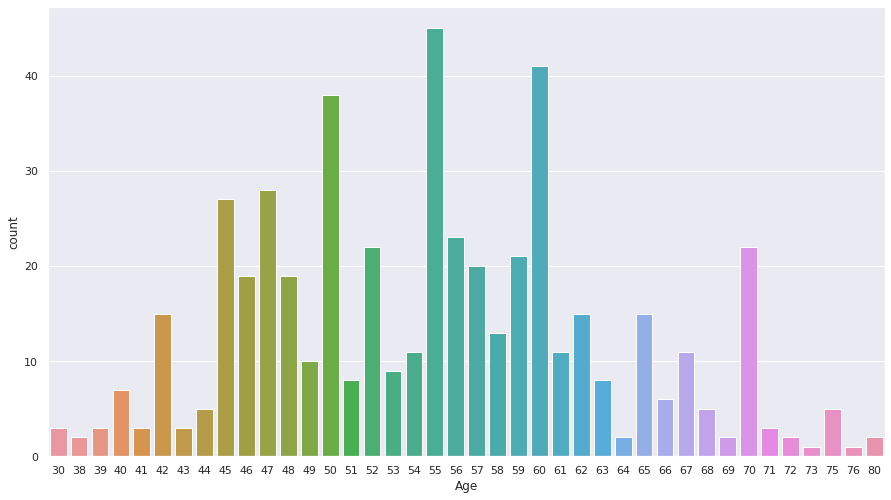

In [ ]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.countplot(x='Age', data=df)

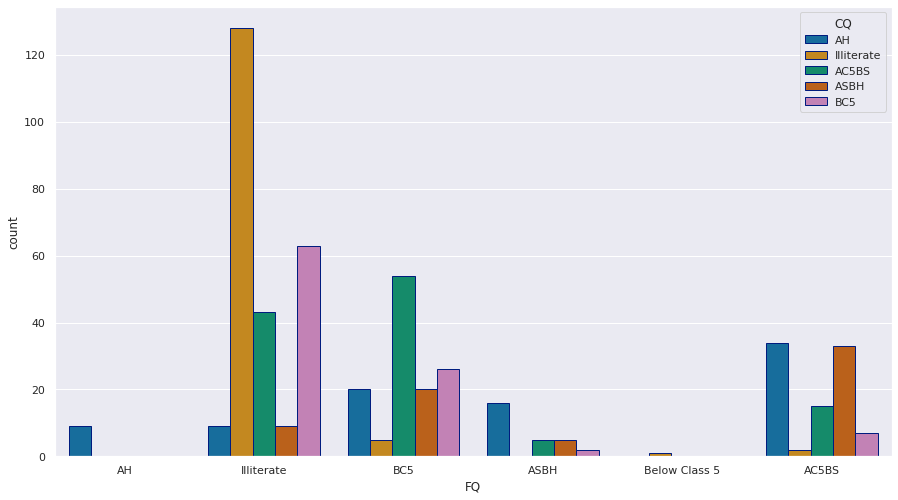

In [ ]:
sns.countplot(x='FQ',hue='CQ',data=df,palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Thesis /Dataset/FQ&CQ.png')

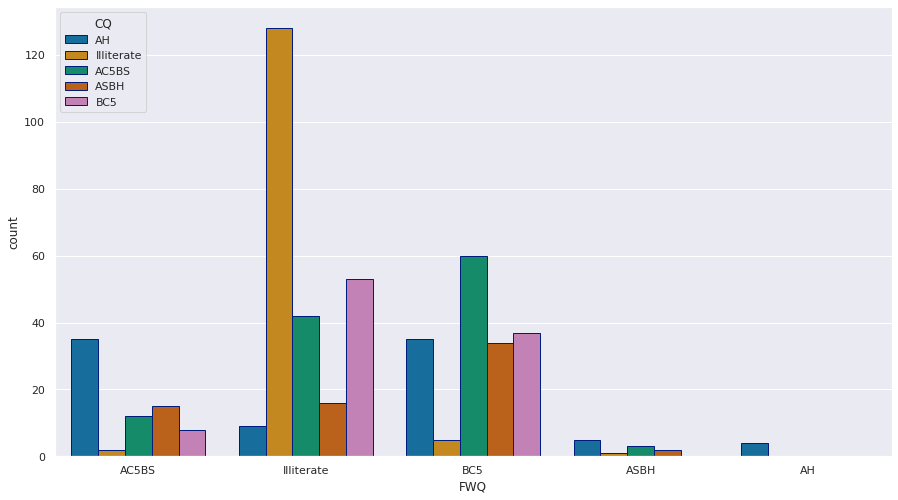

In [ ]:
sns.countplot(x='FWQ',hue='CQ',data=df,palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Thesis /Dataset/FWQ&CQ.png')

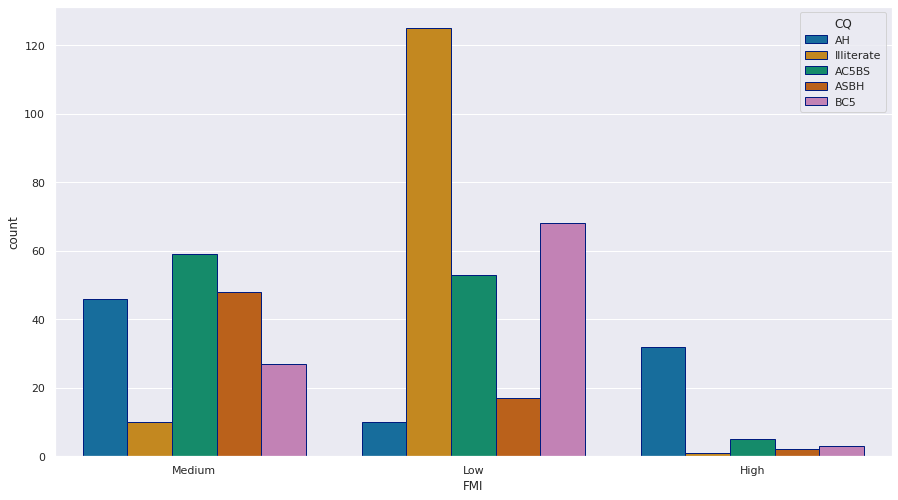

In [ ]:
sns.countplot(x='FMI',hue='CQ',data=df,palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))

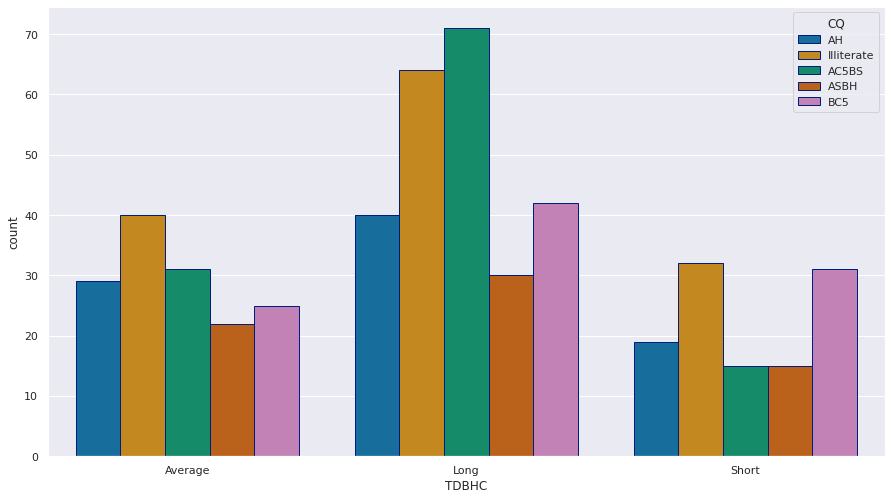

In [ ]:
sns.countplot(x='TDBHC',hue='CQ',data=df,palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))

In [ ]:
df.describe()

,Age,FM,NC,NS,NEP,AOL,ALC
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,54.843874,5.318182,2.768775,1.073123,1.456522,3.569209,3.713834
std,8.482091,1.576921,1.252282,0.260595,0.668297,3.773381,3.457311
min,30.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.500000
25%,48.000000,4.000000,2.000000,1.000000,1.000000,1.500000,2.000000
50%,55.000000,5.000000,3.000000,1.000000,1.000000,2.050000,3.000000
75%,60.000000,6.000000,3.000000,1.000000,2.000000,4.000000,4.000000
max,80.000000,12.000000,8.000000,2.000000,4.000000,30.000000,30.000000


# **Data Prerocessing**

In [ ]:
df.dtypes

Age        int64
FM         int64
NC         int64
NS         int64
FQ        object
FWQ       object
NEP        int64
FMI       object
HEP       object
OH        object
HT        object
EIS       object
AOL      float64
ALC      float64
SC        object
LOAN      object
FDA       object
CDA       object
SFM       object
TDBHC     object
CQ        object
dtype: object

In [ ]:
for col in df:
  print(f'{col}: {df[col].unique()}')

Age: [51 55 57 47 65 63 60 59 48 45 50 54 58 68 67 56 70 46 53 52 49 73 62 80
 64 69 66 76 42 75 72 40 38 30 44 61 39 71 41 43]
FM: [ 5  4  3  6  8  7  9 10  2 12]
NC: [2 3 1 4 6 5 7 8]
NS: [1 2]
FQ: ['AH' 'Illiterate' 'BC5' 'ASBH' 'Below Class 5' 'AC5BS']
FWQ: ['AC5BS' 'Illiterate' 'BC5' 'ASBH' 'AH']
NEP: [1 3 2 4]
FMI: ['Medium' 'Low' 'High']
HEP: ['No' 'Yes']
OH: ['Yes' 'No']
HT: ['Brick_Built' 'Mud_Built' 'Mud built' 'Brick built']
EIS: ['Yes' 'No']
AOL: [ 8.    1.5   2.1   3.    1.    0.5   4.    1.3   2.    7.    0.1  10.
 12.   20.    6.    2.5   0.15  0.6   0.7  13.   16.    3.5  15.    5.
  0.12  9.   22.    0.   30.    0.3  14.   11.    5.5 ]
ALC: [ 4.   3.5  3.   2.   2.5  8.   5.   1.   9.   1.5 18.  11.   4.5 12.
 10.  30.  15.   7.   6.   0.5  6.5 14.  20.   2.6  3.6  7.6  2.7  1.8
  1.7 19.  28.   2.4 13.  16.   3.3  1.1]
SC: ['No' 'Yes']
LOAN: ['No' 'Yes']
FDA: ['No' 'Yes']
CDA: ['No' 'Yes']
SFM: ['No' 'Yes']
TDBHC: ['Average' 'Long' 'Short']
CQ: ['AH' 'Illiterate' 'AC5

In [ ]:
df.replace('Below Class 5', 'BC5', inplace=True)

In [ ]:
df.replace('Mud built', 'Mud_Built', inplace=True)
df.replace('Brick built', 'Brick_Built', inplace=True)

In [ ]:
from  sklearn import preprocessing
lebel_encoder=preprocessing.LabelEncoder()

In [ ]:
df['HEP']=lebel_encoder.fit_transform(df['HEP'])
df['HEP'].unique()

array([0, 1])

In [ ]:
df['OH']=lebel_encoder.fit_transform(df['OH'])
df['OH'].unique()

array([1, 0])

In [ ]:
df['HT']=lebel_encoder.fit_transform(df['HT'])
df['HT'].unique()

array([0, 1])

In [ ]:
df['EIS']=lebel_encoder.fit_transform(df['EIS'])
df['EIS'].unique()

array([1, 0])

In [ ]:
df['SC']=lebel_encoder.fit_transform(df['SC'])
df['SC'].unique()

array([0, 1])

In [ ]:
df['LOAN']=lebel_encoder.fit_transform(df['LOAN'])
df['LOAN'].unique()

array([0, 1])

In [ ]:
df['FDA']=lebel_encoder.fit_transform(df['FDA'])
df['FDA'].unique()

array([0, 1])

In [ ]:
df['CDA']=lebel_encoder.fit_transform(df['CDA'])
df['CDA'].unique()

array([0, 1])

In [ ]:
df['SFM']=lebel_encoder.fit_transform(df['SFM'])
df['SFM'].unique()

array([0, 1])

In [ ]:
df['FQ']=lebel_encoder.fit_transform(df['FQ'])
df['FQ'].unique()

array([1, 4, 3, 2, 0])

In [ ]:
df['FWQ']=lebel_encoder.fit_transform(df['FWQ'])
df['FWQ'].unique()

array([0, 4, 3, 2, 1])

In [ ]:
df['FMI']=lebel_encoder.fit_transform(df['FMI'])
df['FMI'].unique()

array([2, 1, 0])

In [ ]:
df['TDBHC']=lebel_encoder.fit_transform(df['TDBHC'])
df['TDBHC'].unique()

array([0, 1, 2])

In [ ]:
for col in df:
  print(f'{col}: {df[col].unique()}')

Age: [51 55 57 47 65 63 60 59 48 45 50 54 58 68 67 56 70 46 53 52 49 73 62 80
 64 69 66 76 42 75 72 40 38 30 44 61 39 71 41 43]
FM: [ 5  4  3  6  8  7  9 10  2 12]
NC: [2 3 1 4 6 5 7 8]
NS: [1 2]
FQ: [1 4 3 2 0]
FWQ: [0 4 3 2 1]
NEP: [1 3 2 4]
FMI: [2 1 0]
HEP: [0 1]
OH: [1 0]
HT: [0 1]
EIS: [1 0]
AOL: [ 8.    1.5   2.1   3.    1.    0.5   4.    1.3   2.    7.    0.1  10.
 12.   20.    6.    2.5   0.15  0.6   0.7  13.   16.    3.5  15.    5.
  0.12  9.   22.    0.   30.    0.3  14.   11.    5.5 ]
ALC: [ 4.   3.5  3.   2.   2.5  8.   5.   1.   9.   1.5 18.  11.   4.5 12.
 10.  30.  15.   7.   6.   0.5  6.5 14.  20.   2.6  3.6  7.6  2.7  1.8
  1.7 19.  28.   2.4 13.  16.   3.3  1.1]
SC: [0 1]
LOAN: [0 1]
FDA: [0 1]
CDA: [0 1]
SFM: [0 1]
TDBHC: [0 1 2]
CQ: ['AH' 'Illiterate' 'AC5BS' 'ASBH' 'BC5']


In [ ]:
'''more_category=['FQ','FWQ','FMI','TDBHC']'''

"more_category=['FQ','FWQ','FMI','TDBHC']"

In [ ]:
'''n_df=pd.get_dummies(df, columns=more_category)'''


'n_df=pd.get_dummies(df, columns=more_category)'

In [ ]:
df.dtypes

Age        int64
FM         int64
NC         int64
NS         int64
FQ         int64
FWQ        int64
NEP        int64
FMI        int64
HEP        int64
OH         int64
HT         int64
EIS        int64
AOL      float64
ALC      float64
SC         int64
LOAN       int64
FDA        int64
CDA        int64
SFM        int64
TDBHC      int64
CQ        object
dtype: object

In [ ]:
df.head(10)

,Age,FM,NC,NS,FQ,FWQ,NEP,FMI,HEP,OH,HT,EIS,AOL,ALC,SC,LOAN,FDA,CDA,SFM,TDBHC,CQ
0,51,5,2,1,1,0,1,2,0,1,0,1,8.0,4.0,0,0,0,0,0,0,AH
1,55,5,3,1,4,4,3,1,0,1,1,0,1.5,3.5,1,1,0,0,0,1,Illiterate
2,57,4,2,2,4,3,2,1,0,1,1,0,2.1,3.0,1,1,0,0,0,1,Illiterate
3,47,3,1,1,4,0,2,1,0,1,1,0,1.5,2.0,1,1,0,0,0,1,AC5BS
4,65,5,4,1,4,4,1,1,0,1,1,0,3.0,2.0,1,0,0,0,0,1,Illiterate
5,63,6,4,1,4,4,3,1,0,1,1,0,1.0,2.0,1,0,0,0,0,0,Illiterate
6,60,8,3,1,4,4,2,1,0,1,1,0,0.5,2.0,1,1,0,0,0,1,Illiterate
7,59,4,2,1,3,3,2,1,0,1,1,0,3.0,2.0,0,0,0,0,0,1,AC5BS
8,48,6,2,1,3,0,1,2,0,1,0,1,4.0,3.0,0,1,0,0,0,1,ASBH
9,45,4,2,1,3,3,1,1,0,1,1,1,3.0,4.0,1,1,0,0,0,1,AC5BS


In [ ]:
df.dtypes

Age        int64
FM         int64
NC         int64
NS         int64
FQ         int64
FWQ        int64
NEP        int64
FMI        int64
HEP        int64
OH         int64
HT         int64
EIS        int64
AOL      float64
ALC      float64
SC         int64
LOAN       int64
FDA        int64
CDA        int64
SFM        int64
TDBHC      int64
CQ        object
dtype: object

# **Handling missing values**

In [ ]:
df.isnull().sum()
#df[df['TotalCharges'].isnull()]
#df.drop([488],axis=0,inplace=True)

Age      0
FM       0
NC       0
NS       0
FQ       0
FWQ      0
NEP      0
FMI      0
HEP      0
OH       0
HT       0
EIS      0
AOL      0
ALC      0
SC       0
LOAN     0
FDA      0
CDA      0
SFM      0
TDBHC    0
CQ       0
dtype: int64

# **Feature scaling**

In [ ]:
for col in df:
  print(f'{col}: {df[col].unique()}')

Age: [51 55 57 47 65 63 60 59 48 45 50 54 58 68 67 56 70 46 53 52 49 73 62 80
 64 69 66 76 42 75 72 40 38 30 44 61 39 71 41 43]
FM: [ 5  4  3  6  8  7  9 10  2 12]
NC: [2 3 1 4 6 5 7 8]
NS: [1 2]
FQ: [1 4 3 2 0]
FWQ: [0 4 3 2 1]
NEP: [1 3 2 4]
FMI: [2 1 0]
HEP: [0 1]
OH: [1 0]
HT: [0 1]
EIS: [1 0]
AOL: [ 8.    1.5   2.1   3.    1.    0.5   4.    1.3   2.    7.    0.1  10.
 12.   20.    6.    2.5   0.15  0.6   0.7  13.   16.    3.5  15.    5.
  0.12  9.   22.    0.   30.    0.3  14.   11.    5.5 ]
ALC: [ 4.   3.5  3.   2.   2.5  8.   5.   1.   9.   1.5 18.  11.   4.5 12.
 10.  30.  15.   7.   6.   0.5  6.5 14.  20.   2.6  3.6  7.6  2.7  1.8
  1.7 19.  28.   2.4 13.  16.   3.3  1.1]
SC: [0 1]
LOAN: [0 1]
FDA: [0 1]
CDA: [0 1]
SFM: [0 1]
TDBHC: [0 1 2]
CQ: ['AH' 'Illiterate' 'AC5BS' 'ASBH' 'BC5']


In [ ]:
col_scale=['Age','FM','NS','FQ','FWQ','NC','NEP','FMI','AOL','ALC','TDBHC']

In [ ]:
from sklearn.preprocessing  import MinMaxScaler
sc=MinMaxScaler()

In [ ]:
df[col_scale]=sc.fit_transform(df[col_scale])

In [ ]:
for col in df:
  print(f'{col}: {df[col].unique()}')

Age: [0.42 0.5  0.54 0.34 0.7  0.66 0.6  0.58 0.36 0.3  0.4  0.48 0.56 0.76
 0.74 0.52 0.8  0.32 0.46 0.44 0.38 0.86 0.64 1.   0.68 0.78 0.72 0.92
 0.24 0.9  0.84 0.2  0.16 0.   0.28 0.62 0.18 0.82 0.22 0.26]
FM: [0.3 0.2 0.1 0.4 0.6 0.5 0.7 0.8 0.  1. ]
NC: [0.14285714 0.28571429 0.         0.42857143 0.71428571 0.57142857
 0.85714286 1.        ]
NS: [0. 1.]
FQ: [0.25 1.   0.75 0.5  0.  ]
FWQ: [0.   1.   0.75 0.5  0.25]
NEP: [0.         0.66666667 0.33333333 1.        ]
FMI: [1.  0.5 0. ]
HEP: [0 1]
OH: [1 0]
HT: [0 1]
EIS: [1 0]
AOL: [0.26666667 0.05       0.07       0.1        0.03333333 0.01666667
 0.13333333 0.04333333 0.06666667 0.23333333 0.00333333 0.33333333
 0.4        0.66666667 0.2        0.08333333 0.005      0.02
 0.02333333 0.43333333 0.53333333 0.11666667 0.5        0.16666667
 0.004      0.3        0.73333333 0.         1.         0.01
 0.46666667 0.36666667 0.18333333]
ALC: [0.11864407 0.10169492 0.08474576 0.05084746 0.06779661 0.25423729
 0.15254237 0.01694915 0.288

In [ ]:
df.head()

,Age,FM,NC,NS,FQ,FWQ,NEP,FMI,HEP,OH,HT,EIS,AOL,ALC,SC,LOAN,FDA,CDA,SFM,TDBHC,CQ
0,0.42,0.3,0.142857,0.0,0.25,0.00,0.000000,1.0,0,1,0,1,0.266667,0.118644,0,0,0,0,0,0.0,AH
1,0.50,0.3,0.285714,0.0,1.00,1.00,0.666667,0.5,0,1,1,0,0.050000,0.101695,1,1,0,0,0,0.5,Illiterate
2,0.54,0.2,0.142857,1.0,1.00,0.75,0.333333,0.5,0,1,1,0,0.070000,0.084746,1,1,0,0,0,0.5,Illiterate
3,0.34,0.1,0.000000,0.0,1.00,0.00,0.333333,0.5,0,1,1,0,0.050000,0.050847,1,1,0,0,0,0.5,AC5BS
4,0.70,0.3,0.428571,0.0,1.00,1.00,0.000000,0.5,0,1,1,0,0.100000,0.050847,1,0,0,0,0,0.5,Illiterate


In [ ]:
c_df=df

# **Feature Selection using CHi2**


In [ ]:
x=df.drop('CQ', axis='columns')

In [ ]:
y=df['CQ']

In [ ]:
len(df.columns)

21

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
FIT_FEATURES=SelectKBest(score_func=chi2)

FIT_FEATURES.fit(x,y)
srore_col=pd.DataFrame(FIT_FEATURES.scores_,columns=['score value'])
nam_col=pd.DataFrame(x.columns)
top_features=pd.concat([nam_col,srore_col],axis=1)
top_features.columns=['Top features','Score']
top_features
top_features.nlargest(21,'Score')

,Top features,Score
8,HEP,232.839693
10,HT,76.651898
14,SC,39.275916
12,AOL,38.629991
4,FQ,37.950048
13,ALC,27.507991
15,LOAN,24.823032
5,FWQ,21.923386
11,EIS,19.553995
17,CDA,13.368949


# **Select Independent and Dependent features**

In [ ]:
df.head()

,Age,FM,NC,NS,FQ,FWQ,NEP,FMI,HEP,OH,HT,EIS,AOL,ALC,SC,LOAN,FDA,CDA,SFM,TDBHC,CQ
0,0.42,0.3,0.142857,0.0,0.25,0.00,0.000000,1.0,0,1,0,1,0.266667,0.118644,0,0,0,0,0,0.0,AH
1,0.50,0.3,0.285714,0.0,1.00,1.00,0.666667,0.5,0,1,1,0,0.050000,0.101695,1,1,0,0,0,0.5,Illiterate
2,0.54,0.2,0.142857,1.0,1.00,0.75,0.333333,0.5,0,1,1,0,0.070000,0.084746,1,1,0,0,0,0.5,Illiterate
3,0.34,0.1,0.000000,0.0,1.00,0.00,0.333333,0.5,0,1,1,0,0.050000,0.050847,1,1,0,0,0,0.5,AC5BS
4,0.70,0.3,0.428571,0.0,1.00,1.00,0.000000,0.5,0,1,1,0,0.100000,0.050847,1,0,0,0,0,0.5,Illiterate


In [ ]:
x=df.drop('CQ', axis='columns')

In [ ]:
x.head()

,Age,FM,NC,NS,FQ,FWQ,NEP,FMI,HEP,OH,HT,EIS,AOL,ALC,SC,LOAN,FDA,CDA,SFM,TDBHC
0,0.42,0.3,0.142857,0.0,0.25,0.00,0.000000,1.0,0,1,0,1,0.266667,0.118644,0,0,0,0,0,0.0
1,0.50,0.3,0.285714,0.0,1.00,1.00,0.666667,0.5,0,1,1,0,0.050000,0.101695,1,1,0,0,0,0.5
2,0.54,0.2,0.142857,1.0,1.00,0.75,0.333333,0.5,0,1,1,0,0.070000,0.084746,1,1,0,0,0,0.5
3,0.34,0.1,0.000000,0.0,1.00,0.00,0.333333,0.5,0,1,1,0,0.050000,0.050847,1,1,0,0,0,0.5
4,0.70,0.3,0.428571,0.0,1.00,1.00,0.000000,0.5,0,1,1,0,0.100000,0.050847,1,0,0,0,0,0.5


In [ ]:
y=df['CQ']

In [ ]:
y.head(15)

0             AH
1     Illiterate
2     Illiterate
3          AC5BS
4     Illiterate
5     Illiterate
6     Illiterate
7          AC5BS
8           ASBH
9          AC5BS
10            AH
11          ASBH
12    Illiterate
13           BC5
14         AC5BS
Name: CQ, dtype: object

# **Decission** **Tree**

In [ ]:
y_new=lebel_encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y =train_test_split(x,y_new,test_size= 0.2,random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=3)

In [ ]:
clf = clf.fit(train_x,train_y)

In [ ]:
clf.score(test_x,test_y)

0.8431372549019608

In [ ]:
pred_dt = clf.predict(test_x)

In [ ]:
pred_dt

array([3, 3, 1, 4, 3, 1, 3, 0, 1, 4, 4, 0, 4, 4, 3, 4, 3, 0, 1, 3, 4, 4,
       4, 2, 0, 2, 1, 3, 3, 1, 0, 4, 0, 1, 2, 0, 1, 0, 3, 0, 1, 3, 1, 4,
       4, 3, 3, 1, 4, 0, 1, 1, 4, 2, 1, 4, 0, 4, 4, 0, 4, 0, 4, 0, 2, 2,
       0, 4, 0, 2, 0, 1, 1, 4, 1, 2, 3, 0, 3, 3, 4, 0, 3, 0, 4, 2, 0, 4,
       1, 1, 4, 1, 2, 4, 0, 0, 4, 4, 1, 3, 4, 4])

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy=",accuracy_score(test_y,pred_dt))

Accuracy= 0.8431372549019608


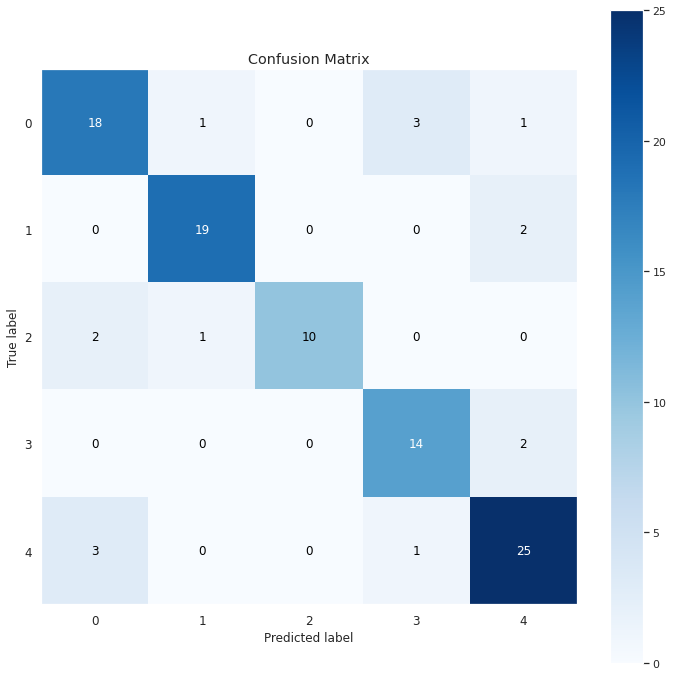

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    test_y, 
    pred_dt,
    figsize=(12,12))
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Thesis /Dataset/DT_Confusion.png')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_dt))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        23
           1       0.90      0.90      0.90        21
           2       1.00      0.77      0.87        13
           3       0.78      0.88      0.82        16
           4       0.83      0.86      0.85        29

    accuracy                           0.84       102
   macro avg       0.86      0.84      0.85       102
weighted avg       0.85      0.84      0.84       102



k-fold cross validation


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_score=cross_val_score(clf,x,y,cv=5)

In [ ]:
cv_score

array([0.80392157, 0.84158416, 0.84158416, 0.92079208, 0.84158416])

In [ ]:
cv_score.mean()

0.8498932246165793

AUC-ROC Curve 

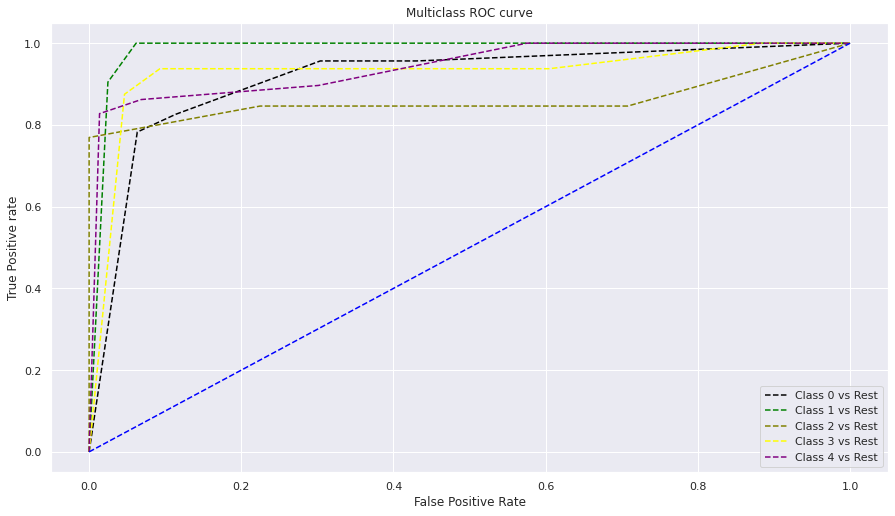

In [ ]:
y_pred_proba=clf.predict_proba(test_x)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc_score(test_y, y_pred_proba, multi_class='ovo', average='weighted')

fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_y, y_pred_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='olive', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot([0, 1], [0, 1], color="blue", linestyle="--")
plt.title("Multiclass ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Thesis /Dataset/DT_ROC.png')

# **Random Forest**

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y =train_test_split(x,y_new,test_size= 0.2,random_state=2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Rclf = RandomForestClassifier(n_estimators=115,criterion="entropy",max_depth=5)

In [ ]:
Rclf.fit(train_x,train_y)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=115)

In [ ]:
Rclf.score(test_x,test_y)

0.8627450980392157

In [ ]:
pred_rf = Rclf.predict(test_x)

In [ ]:
pred_rf

array([1, 4, 3, 0, 4, 4, 0, 1, 4, 3, 1, 4, 0, 1, 3, 4, 1, 4, 3, 1, 3, 0,
       1, 0, 0, 3, 3, 3, 2, 3, 4, 0, 0, 0, 4, 4, 3, 3, 4, 0, 4, 2, 4, 1,
       0, 3, 2, 0, 3, 3, 4, 0, 1, 3, 4, 0, 0, 0, 4, 4, 1, 3, 4, 4, 4, 0,
       4, 2, 1, 0, 3, 3, 0, 1, 0, 4, 4, 0, 4, 0, 1, 3, 0, 2, 1, 2, 4, 4,
       3, 3, 4, 0, 2, 0, 2, 2, 0, 2, 4, 4, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy=",accuracy_score(test_y,pred_rf))

Accuracy= 0.8627450980392157


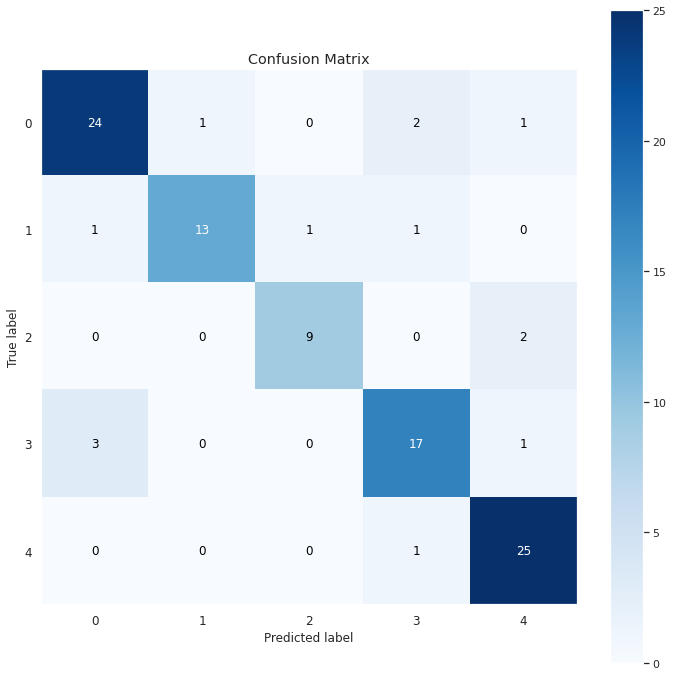

In [ ]:

import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    test_y, 
    pred_rf,
    figsize=(12,12))
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Thesis /Dataset/RF_Confusion.png')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.93      0.81      0.87        16
           2       0.90      0.82      0.86        11
           3       0.81      0.81      0.81        21
           4       0.86      0.96      0.91        26

    accuracy                           0.86       102
   macro avg       0.87      0.85      0.86       102
weighted avg       0.86      0.86      0.86       102



k-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_score=cross_val_score(Rclf,x,y,cv=5)

In [ ]:
cv_score

array([0.80392157, 0.86138614, 0.84158416, 0.91089109, 0.84158416])

In [ ]:
cv_score.mean()

0.8518734226363813

AUC-ROC Curve

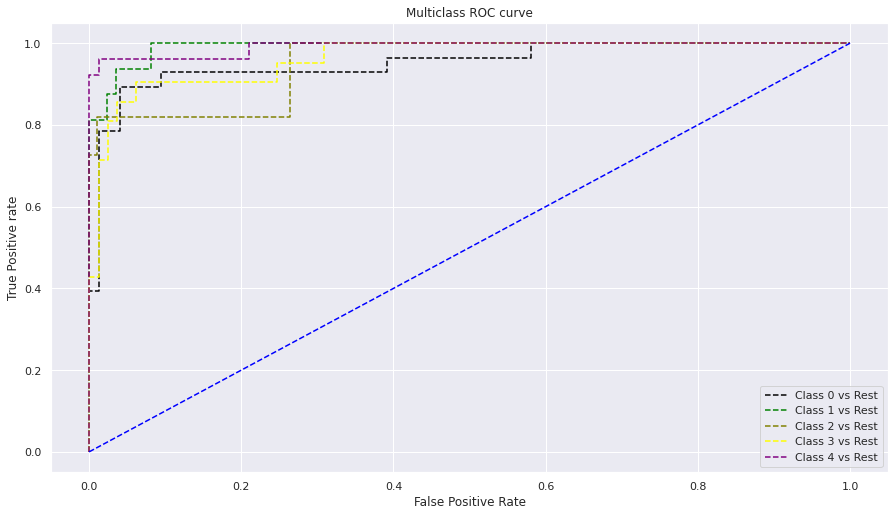

In [ ]:
y_pred_proba=Rclf.predict_proba(test_x)
from sklearn.metrics import roc_auc_score
roc_auc_score(test_y, y_pred_proba, multi_class='ovo', average='weighted')

fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_y, y_pred_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='olive', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot([0, 1], [0, 1], color="blue", linestyle="--")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Thesis /Dataset/RF_ROC.png')        

# **AdaBoost**

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y =train_test_split(x,y_new,test_size= 0.2,random_state=1)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=105, learning_rate=1, random_state=1)
model1 = ada.fit(train_x,train_y)

In [ ]:
model1.score(test_x,test_y)

0.7450980392156863

In [ ]:
pred_ada = model1.predict(test_x)

In [ ]:
pred_ada

array([3, 3, 2, 4, 0, 1, 3, 0, 2, 4, 4, 0, 4, 4, 3, 4, 3, 0, 1, 0, 4, 4,
       4, 2, 0, 2, 2, 3, 0, 1, 0, 4, 0, 1, 2, 0, 1, 0, 4, 0, 1, 3, 1, 4,
       4, 0, 1, 1, 4, 0, 1, 2, 4, 2, 1, 3, 0, 4, 3, 0, 1, 0, 4, 0, 1, 2,
       0, 4, 4, 2, 0, 1, 1, 4, 2, 2, 3, 0, 0, 3, 3, 0, 3, 0, 3, 2, 0, 4,
       1, 1, 4, 1, 0, 4, 0, 0, 0, 4, 1, 3, 4, 4])

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy=",accuracy_score(test_y,pred_ada))

Accuracy= 0.7450980392156863


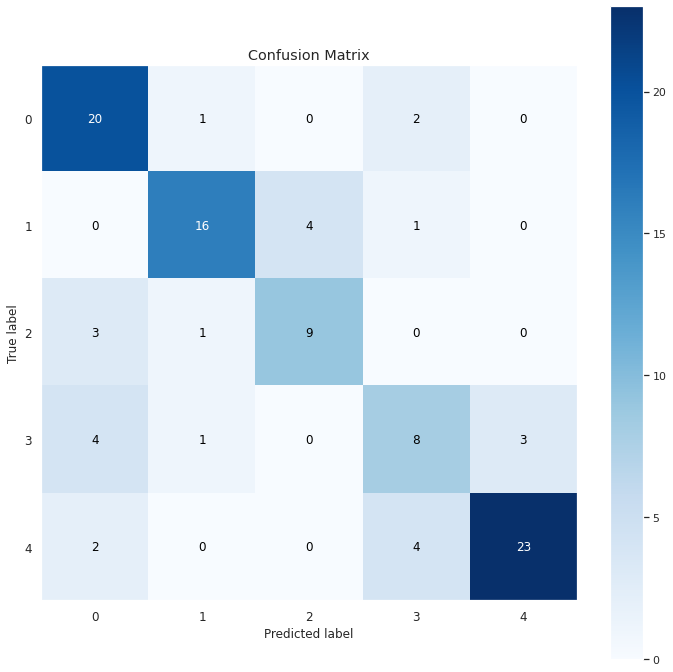

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    test_y, 
    pred_ada,
    figsize=(12,12))
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Thesis /Dataset/Confusion_ada.png')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_ada))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77        23
           1       0.84      0.76      0.80        21
           2       0.69      0.69      0.69        13
           3       0.53      0.50      0.52        16
           4       0.88      0.79      0.84        29

    accuracy                           0.75       102
   macro avg       0.73      0.72      0.72       102
weighted avg       0.75      0.75      0.75       102



k-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(model1,x,y,cv=5)
cv_score

array([0.7254902 , 0.74257426, 0.8019802 , 0.77227723, 0.7029703 ])

In [ ]:
cv_score.mean()

0.74905843525529

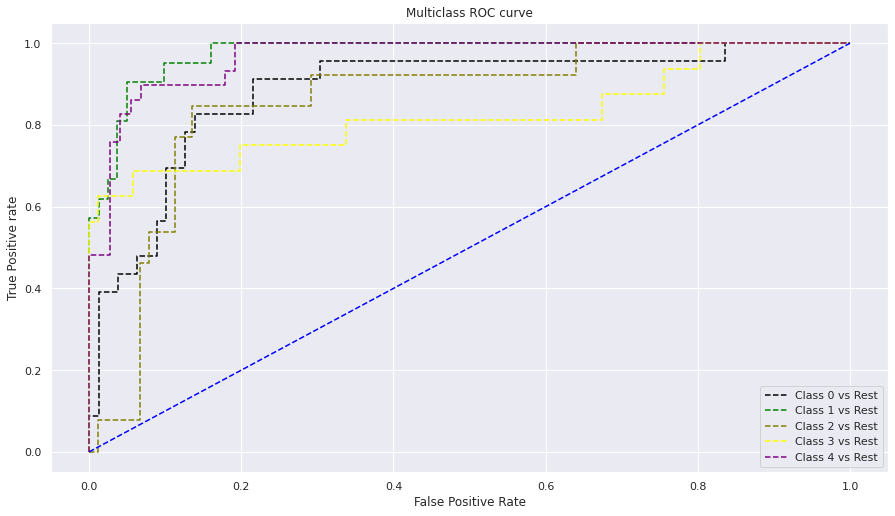

In [ ]:
y_pred_proba=model1.predict_proba(test_x)
from sklearn.metrics import roc_auc_score
roc_auc_score(test_y, y_pred_proba, multi_class='ovo', average='weighted')

fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_y, y_pred_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='olive', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot([0, 1], [0, 1], color="blue", linestyle="--")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Thesis /Dataset/Ada_ROC.png')        

# **Gradient Boosting Classifier**

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y =train_test_split(x,y_new,test_size= 0.2,random_state=1)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
boost=GradientBoostingClassifier(n_estimators=150,learning_rate=0.01,max_depth=3,max_leaf_nodes=10)
model2 = boost.fit(train_x,train_y)

In [ ]:
model2.score(test_x,test_y)

0.8529411764705882

In [ ]:
pred_b = model2.predict(test_x)
pred_b

array([3, 3, 1, 3, 3, 1, 3, 0, 1, 4, 4, 0, 4, 4, 3, 4, 3, 0, 1, 4, 4, 4,
       4, 2, 0, 2, 1, 3, 3, 1, 0, 4, 0, 1, 2, 0, 1, 0, 3, 0, 1, 3, 1, 4,
       4, 3, 3, 1, 4, 0, 1, 1, 4, 2, 1, 4, 0, 4, 4, 0, 0, 0, 4, 0, 2, 2,
       0, 4, 0, 2, 0, 1, 1, 4, 1, 2, 3, 0, 3, 3, 4, 0, 3, 0, 4, 2, 0, 4,
       1, 1, 4, 1, 2, 4, 0, 0, 0, 4, 1, 3, 4, 4])

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy=",accuracy_score(test_y,pred_b))

Accuracy= 0.8529411764705882


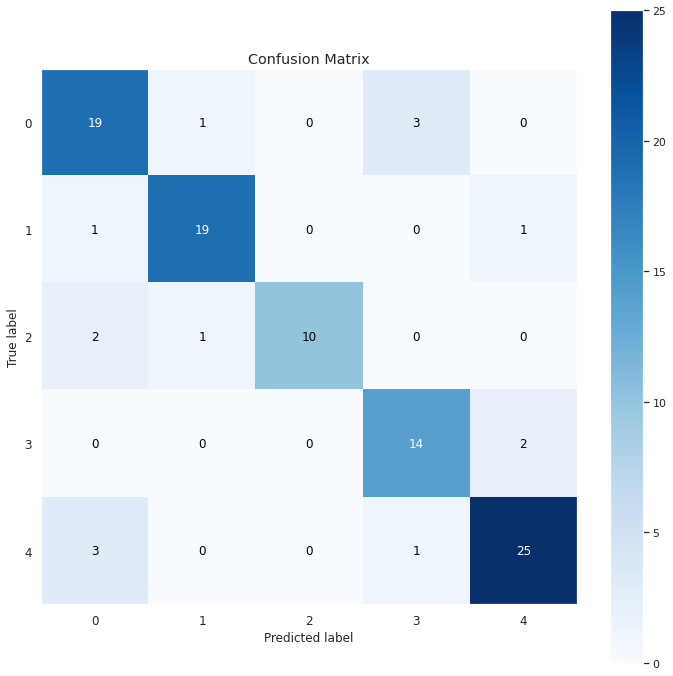

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    test_y, 
    pred_b,
    figsize=(12,12))
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Thesis /Dataset/Confusion_Gboost.png')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_b))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        23
           1       0.90      0.90      0.90        21
           2       1.00      0.77      0.87        13
           3       0.78      0.88      0.82        16
           4       0.89      0.86      0.88        29

    accuracy                           0.85       102
   macro avg       0.87      0.85      0.85       102
weighted avg       0.86      0.85      0.85       102



k-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(model2,x,y,cv=5)
cv_score

array([0.81372549, 0.85148515, 0.89108911, 0.93069307, 0.85148515])

In [ ]:
cv_score.mean()

0.8676955930887207

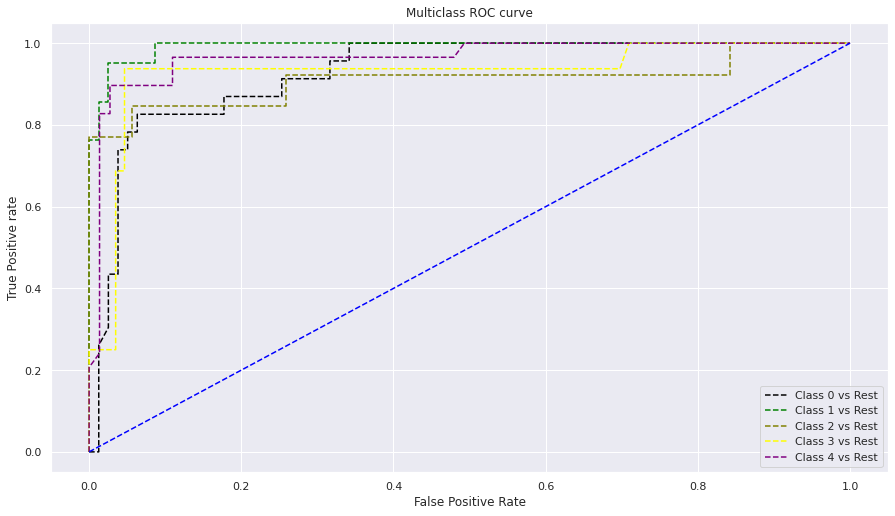

In [ ]:
y_pred_proba=model2.predict_proba(test_x)
from sklearn.metrics import roc_auc_score
roc_auc_score(test_y, y_pred_proba, multi_class='ovo', average='weighted')

fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_y, y_pred_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='olive', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot([0, 1], [0, 1], color="blue", linestyle="--")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Thesis /Dataset/Gboost_ROC.png')    

# **Support Vector Machines**

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y =train_test_split(x,y_new,test_size= 0.2,random_state=2)

In [ ]:
from sklearn.svm import SVC
Sclf =SVC(C=3.0, kernel='linear', degree=2, gamma='scale',max_iter=-1,probability=True)
model3=Sclf.fit(train_x,train_y)

In [ ]:
model3.score(test_x,test_y)

0.6176470588235294

In [ ]:
pred_S = Sclf.predict(test_x)

In [ ]:
pred_S

array([1, 4, 3, 0, 4, 3, 0, 1, 4, 3, 2, 4, 0, 2, 3, 4, 1, 4, 3, 1, 3, 3,
       1, 1, 0, 3, 3, 3, 0, 4, 4, 0, 0, 0, 4, 4, 3, 2, 4, 0, 4, 2, 4, 1,
       0, 0, 0, 0, 4, 3, 4, 0, 1, 3, 4, 4, 4, 0, 4, 4, 1, 0, 4, 4, 4, 2,
       4, 2, 1, 3, 4, 3, 0, 1, 0, 4, 4, 0, 0, 0, 1, 0, 3, 0, 1, 3, 3, 4,
       3, 4, 3, 0, 2, 3, 0, 0, 3, 0, 4, 3, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy=",accuracy_score(test_y,pred_S))

Accuracy= 0.6176470588235294


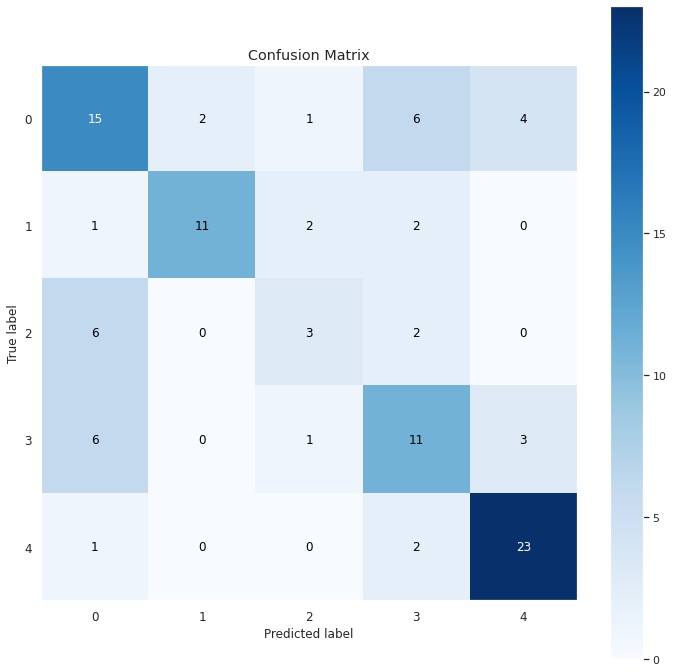

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    test_y, 
    pred_S,
    figsize=(12,12))
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Thesis /Dataset/SVM_Confusion.png')    

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_S))

              precision    recall  f1-score   support

           0       0.52      0.54      0.53        28
           1       0.85      0.69      0.76        16
           2       0.43      0.27      0.33        11
           3       0.48      0.52      0.50        21
           4       0.77      0.88      0.82        26

    accuracy                           0.62       102
   macro avg       0.61      0.58      0.59       102
weighted avg       0.61      0.62      0.61       102



k-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_score=cross_val_score(model3,x,y,cv=5)

In [ ]:
cv_score

array([0.62745098, 0.66336634, 0.53465347, 0.58415842, 0.58415842])

In [ ]:
cv_score.mean()

0.5987575228111047

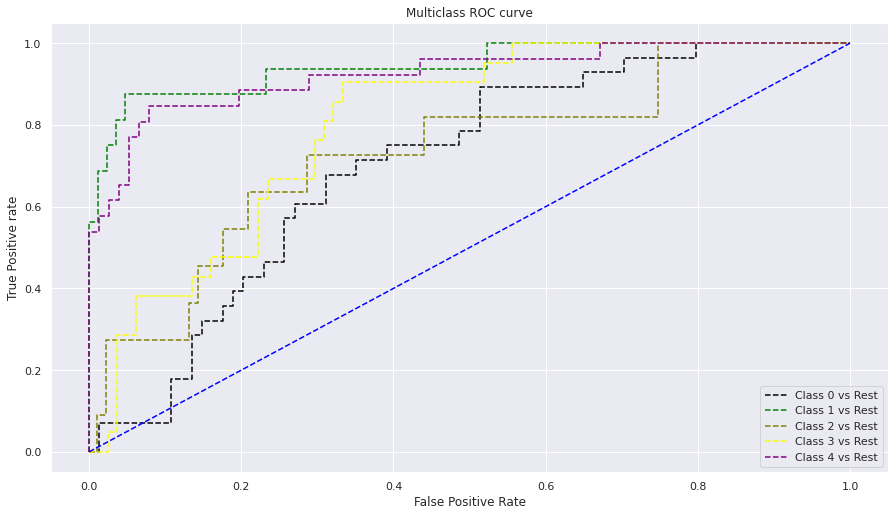

In [ ]:
y_pred_proba=model3.predict_proba(test_x)
from sklearn.metrics import roc_auc_score
roc_auc_score(test_y, y_pred_proba, multi_class='ovo', average='weighted')

fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_y, y_pred_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='olive', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot([0, 1], [0, 1], color="blue", linestyle="--")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Thesis /Dataset/SVM_ROC.png')         